In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
import folium
%matplotlib inline


In [3]:
data_distance = pd.read_csv('bee_pos_distance_date.csv',index_col=0)

In [26]:
data_svm['Detection Date'] = pd.to_datetime(data_svm['Detection Date'])
data_svm.index = data_svm['Detection Date']

In [131]:
date_list = ['2021-01-29', '2021-02-28', '2021-03-30',
             '2021-04-30', '2021-05-31', 
             '2021-06-30', '2021-07-31','2021-08-31', '2021-09-30', '2021-10-31',
             '2021-11-29', '2021-12-31', 
             '2022-01-31']
future = pd.DataFrame(data=date_list,columns=['Date'])
future['Date'] = pd.to_datetime(future['Date'])

test1 = data_distance['Distance'].copy()
test1.index = data_distance.index

In [132]:
test1 = test1.resample('MS').mean()
test1.index.freq = 'MS'

In [133]:
test1.index

DatetimeIndex(['2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01'],
              dtype='datetime64[ns]', name='Detection Date', freq='MS')

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#df = data_distance['Distance'].copy()
# df.index = data_distance.index
#df = df.resample('M').sum()
#df.index.freq = 'M'
#train, test = df.iloc[0:5], df.iloc[5:12]
# {"add", "mul", "additive", "multiplicative"

model = ExponentialSmoothing(data_svm['Latitude'],seasonal="mul",seasonal_periods=11).fit()
test1 = data_svm['Latitude'].copy()
test1.index = data_distance.index
pred = model.predict(start=test1.index[0],end=test1.index[-1])
#pred = model.predict(start=test1.index[0],end=test1.index[-1])[1:]
# model.summary()
# model.save('predict.')
# seasonal='mul', seasonal_periods=12
plt.plot(data_svm['Latitude'].index, data_svm['Latitude'], label='Train')
plt.plot(test1.index, test1, label='Test',c='g')
plt.plot(pred.index, pred, label='Predict',c='r')
plt.legend(loc='best')

plt.title('Holtwinters ExponentialSmoothing')
plt.xlabel('Date')
plt.ylabel('Move Distance')
plt.savefig('Holtwinters_ExponentialSmoothing_Predict.jpg',dpi=800)


D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


ValueError: Length mismatch: Expected axis has 4424 elements, new values have 13 elements

In [6]:
model.summary()

Dep. Variable:,endog,No. Observations:,13
Model:,ExponentialSmoothing,SSE,5.958
Optimized:,True,AIC,15.858
Trend:,None,BIC,23.202
Seasonal:,Multiplicative,AICC,inf
Seasonal Periods:,11,Date:,"Sun, 07 Feb 2021"
Box-Cox:,False,Time:,09:04:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8421053,alpha,True
smoothing_seasonal,0.1578947,gamma,True


In [149]:
model.summary()

Dep. Variable:,endog,No. Observations:,13
Model:,ExponentialSmoothing,SSE,5.958
Optimized:,True,AIC,15.858
Trend:,None,BIC,23.202
Seasonal:,Multiplicative,AICC,inf
Seasonal Periods:,11,Date:,"Sun, 07 Feb 2021"
Box-Cox:,False,Time:,00:06:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8421053,alpha,True
smoothing_seasonal,0.1578947,gamma,True


In [9]:
data_distance['Distance Predict'] = pred

In [11]:
data_distance['Error'] = data_distance['Distance Predict'] - data_distance['Distance'] 

In [17]:
 Relative_Error= abs(data_distance['Error'])/data_distance['Distance'] 
 data_distance['Relative Error'] =  Relative_Error.map(lambda x:'{:.6%}'.format(x))

In [19]:
data_distance.to_csv('distance_predict_optimize.csv')

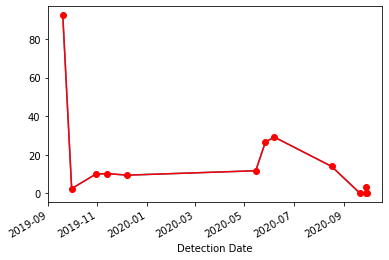

In [21]:
data_distance['Distance'].plot()
data_distance['Distance Predict'].plot(c='r',marker='o')

In [31]:
data_temp = pd.read_excel('Images_by_GlobalID.xlsx')

data = pd.read_csv('origin_date_x_y_data_2.csv',index_col=0)
data.head()

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude,x,y
0,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},2019-12-08,"One dead wasp seen in Blaine, and suspect flyi...",Positive ID,,2020-01-15,48.980994,-122.688503,6383123,5968292
1,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},2019-10-30,Hornet specimen sent to WSU,Positive ID,,2020-01-15,48.971949,-122.700941,6381737,5969179
2,{13B67BCB-AFCE-4100-AD2B-76EF178BA228},2020-01-15,"Massive loss of bees, decapitated. No hornet s...",Unverified,,2020-01-15,48.939200,-122.661300,6386152,5972392
3,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},2019-09-19,This was the colony that was found and destroy...,Positive ID,"Thanks for adding this, and the great pictures!",2020-02-04,49.149394,-123.943134,6243387,5951750
4,{BBBA5BA0-CAFB-43D3-8F1D-FB2D9CF777E0},2019-08-31,I was cleaning my gutters when I heard a snapp...,Unverified,Thanks for this report. I can't verify it from...,2020-02-14,48.723779,-122.354431,6420330,5993496


In [3]:
data_temp.head()

,FileName,GlobalID,FileType
0,ATT1_DSCN9647.jpg,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},image/jpg
1,ATT10_67EAF187-B59C-4F5F-BAAC-9F76E06A96D6.jpg,{C4F44511-EA53-4FCF-9422-E1C57703720D},image/jpg
2,ATT100_inbound241937372812029587.jpg,{43506835-18B8-46B2-A2CB-586AF9C8ECE6},image/jpg
3,ATT1000_A5A50BAB-A6EF-4576-A1F8-A07862AADE3A.jpg,{E0AE2F2A-38A5-463C-97B5-9F84A477F9AE},image/jpg
4,ATT1001_8B9F8599-61EF-4690-B195-888BCD319F32.png,{1CD14B56-4046-44C4-B1B8-8FB07A9071E9},image/png


In [32]:
data_image = pd.merge(data,data_temp)

In [33]:
data_image = data_image[['GlobalID','Detection Date','Lab Status','FileType','FileName']]

In [34]:
data_svm = data[['Detection Date','Latitude','Longitude','Lab Status']]

In [78]:
import sys
path = 'C:\\Users\\14734\\Desktop\\libsvm-3.24\\python'
sys.path.append(path)
from svmutil import *

In [36]:
data_svm.tail()

,Detection Date,Latitude,Longitude,Lab Status
4419,2020-10-02,47.145673,-122.566734,Unprocessed
4420,2020-08-29,48.997938,-122.729890,Unprocessed
4421,2020-10-23,47.651710,-122.692750,Unprocessed
4422,2020-10-19,47.690120,-122.509780,Unprocessed
4423,2020-08-04,45.968985,-122.386562,Unprocessed


In [11]:
import matplotlib.dates as mdate

In [39]:
data_svm['Detection Date'] = pd.to_datetime(data_svm['Detection Date'])

data_svm['Detection Num'] = data_svm['Detection Date'].map(lambda x: mdate.date2num(x))

In [40]:
data_svm

,Detection Date,Latitude,Longitude,Lab Status,Detection Num
0,2019-12-08,48.980994,-122.688503,Positive ID,737401.0
1,2019-10-30,48.971949,-122.700941,Positive ID,737362.0
2,2020-01-15,48.939200,-122.661300,Unverified,737439.0
3,2019-09-19,49.149394,-123.943134,Positive ID,737321.0
4,2019-08-31,48.723779,-122.354431,Unverified,737302.0
...,...,...,...,...,...
4419,2020-10-02,47.145673,-122.566734,Unprocessed,737700.0
4420,2020-08-29,48.997938,-122.729890,Unprocessed,737666.0
4421,2020-10-23,47.651710,-122.692750,Unprocessed,737721.0
4422,2020-10-19,47.690120,-122.509780,Unprocessed,737717.0


> Unverified = 3

> Unprocessed = 2

> Positive ID = 1

> Negative ID = 0


In [41]:
data2 = data_svm['Lab Status'].map(lambda x: 1 if x =='Positive ID' else (0 if x=='Negative ID' else ( 2 if x=='Unprocessed' else(3 if x== 'Unverified' else x))))
#data2 = data_svm['Lab Status'].map(lambda x: 1 if x =='Positive ID' else x)


In [43]:
data_svm['Lab Status'] = data2

In [44]:
data_svm['Detection Normal'] = (data_svm['Detection Num']-data_svm['Detection Num'].mean())/(data_svm['Detection Num'].std())

In [45]:
data_svm

,Detection Date,Latitude,Longitude,Lab Status,Detection Num,Detection Normal
0,2019-12-08,48.980994,-122.688503,1,737401.0,-0.568116
1,2019-10-30,48.971949,-122.700941,1,737362.0,-0.684342
2,2020-01-15,48.939200,-122.661300,3,737439.0,-0.454871
3,2019-09-19,49.149394,-123.943134,1,737321.0,-0.806527
4,2019-08-31,48.723779,-122.354431,3,737302.0,-0.863150
...,...,...,...,...,...,...
4419,2020-10-02,47.145673,-122.566734,2,737700.0,0.322945
4420,2020-08-29,48.997938,-122.729890,2,737666.0,0.221620
4421,2020-10-23,47.651710,-122.692750,2,737721.0,0.385528
4422,2020-10-19,47.690120,-122.509780,2,737717.0,0.373607


In [22]:
data_svm = pd.read_csv('svm_no_notes_normal.csv',index_col=0)

# labels 1:Detection Num 2:Latitude 3:Longitude

In [23]:
data_svm

,Detection Date,Latitude,Longitude,Lab Status,Detection Num,labels,Detection Normal
0,2019-12-08,48.980994,-122.688503,Positive ID,737401.0,1,-0.568116
1,2019-10-30,48.971949,-122.700941,Positive ID,737362.0,1,-0.684342
2,2020-01-15,48.939200,-122.661300,Unverified,737439.0,3,-0.454871
3,2019-09-19,49.149394,-123.943134,Positive ID,737321.0,1,-0.806527
4,2019-08-31,48.723779,-122.354431,Unverified,737302.0,3,-0.863150
...,...,...,...,...,...,...,...
4419,2020-10-02,47.145673,-122.566734,Unprocessed,737700.0,2,0.322945
4420,2020-08-29,48.997938,-122.729890,Unprocessed,737666.0,2,0.221620
4421,2020-10-23,47.651710,-122.692750,Unprocessed,737721.0,2,0.385528
4422,2020-10-19,47.690120,-122.509780,Unprocessed,737717.0,2,0.373607


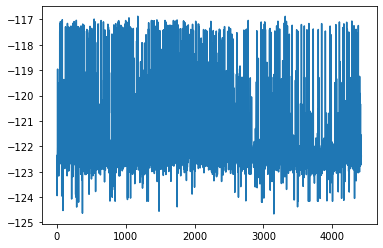

In [88]:
data_svm['Longitude'].plot()
plt.savefig('2.jpg',dpi=800)

In [307]:
train = open('C:\\Users\\14734\\Desktop\\libsvm-3.24\\tools\\bee_svm_train.txt','w')
test = open('C:\\Users\\14734\\Desktop\\libsvm-3.24\\tools\\bee_svm_test.txt','w')


In [308]:
def csv2svm(file1,file2,num):
    for i in range(num):
        if data_svm['labels'][i] != 2  :
            file1.write(str(data_svm['labels'][i])+' '+'1:'+str(data_svm['year'][i])+' '+'2:'+str(data_svm['Latitude'][i])+' '+'3:'+str(data_svm['Longitude'][i])+' '+'4:'+str(data_svm['month'][i])+' '+'5:'+str(len(data_svm['Notes'][i]))+'\n')

    for i in range(num,len(data_svm)):
        if data_svm['labels'][i] != 2  :
            file2.write(str(data_svm['labels'][i])+' '+'1:'+str(data_svm['year'][i])+' '+'2:'+str(data_svm['Latitude'][i])+' '+'3:'+str(data_svm['Longitude'][i])+' '+'4:'+str(data_svm['month'][i])+' '+'5:'+str(len(data_svm['Notes'][i]))+'\n')
    
    file1.close()
    file2.close()

In [309]:
csv2svm(train,test,2500)

In [209]:
data_svm.to_csv('data_svm.csv')

In [67]:
data_svm

,Detection Date,Latitude,Longitude,Lab Status,Detection Num,Detection Normal
0,2019-12-08,48.980994,-122.688503,1,737401.0,-0.568116
1,2019-10-30,48.971949,-122.700941,1,737362.0,-0.684342
2,2020-01-15,48.939200,-122.661300,3,737439.0,-0.454871
3,2019-09-19,49.149394,-123.943134,1,737321.0,-0.806527
4,2019-08-31,48.723779,-122.354431,3,737302.0,-0.863150
...,...,...,...,...,...,...
4419,2020-10-02,47.145673,-122.566734,2,737700.0,0.322945
4420,2020-08-29,48.997938,-122.729890,2,737666.0,0.221620
4421,2020-10-23,47.651710,-122.692750,2,737721.0,0.385528
4422,2020-10-19,47.690120,-122.509780,2,737717.0,0.373607


In [311]:

y, x = svm_read_problem('C:\\Users\\14734\\Desktop\\libsvm-3.24\\tools\\bee_svm_train.txt')
yt, xt = svm_read_problem('C:\\Users\\14734\\Desktop\\libsvm-3.24\\tools\\bee_svm_test.txt')
#params = svm_parameter(32,0.5,61.0)
params = '-c 32768.0 -g 3.0517578125e-05'
model = svm_train(y, x)

In [120]:
model.get_nr_class

<bound method svm_model.get_nr_class of <svm.svm_model object at 0x000001D6096E1448>>

In [312]:
p_label, p_acc, p_val = svm_predict(yt, xt, model)

Accuracy = 57.3075% (1094/1909) (classification)


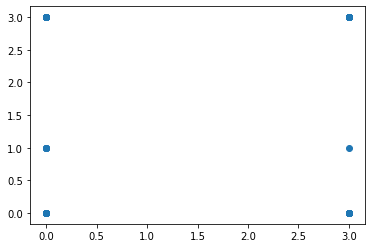

In [315]:
plt.scatter(p_label,yt)

In [60]:
p_acc

(44.9438202247191, 4.853932584269663, 0.0038067150338171067)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [90]:
data_pos = data[data['Lab Status'] == 'Positive ID']

In [99]:
data_pos['Detection Date'] = pd.to_datetime(data_pos['Detection Date'])
data_pos['Date'] = data_pos['Detection Date'].map(lambda x: mdate.date2num(x))

In [100]:
data_pos_lat = data_pos[['Latitude','Date']]
data_pos_long = data_pos[['Longitude','Date']]

In [101]:
data_pos_lat

,Latitude,Date
0,48.980994,737401.0
1,48.971949,737362.0
3,49.149394,737321.0
823,48.955587,737572.0
913,49.025831,737376.0
945,49.060215,737560.0
1000,48.777534,737583.0
1058,48.993892,737332.0
3264,48.927519,737654.0
4112,48.984269,737689.0


In [102]:
data_pos_lat.corr()

,Latitude,Date
Latitude,1.000000,-0.365686
Date,-0.365686,1.000000


In [104]:
data_pos_long.corr()

,Longitude,Date
Longitude,1.000000,0.548072
Date,0.548072,1.000000


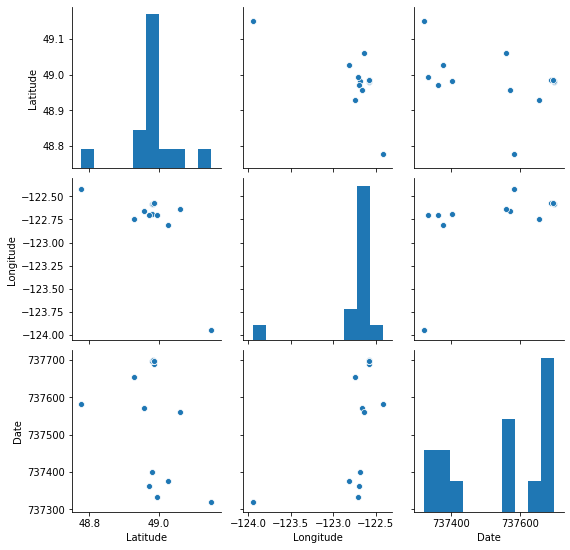

In [103]:
sns.pairplot(data_pos)

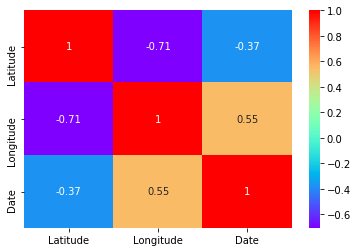

In [109]:
sns.heatmap(data_pos.corr(),annot=True,cmap='rainbow')
plt.savefig('Corr.png',dpi=800)

In [123]:
data_pos.to_csv('data_pos_num.csv')

In [24]:
data_svm

,Detection Date,Latitude,Longitude,Lab Status,Detection Num,labels,Detection Normal
0,2019-12-08,48.980994,-122.688503,Positive ID,737401.0,1,-0.568116
1,2019-10-30,48.971949,-122.700941,Positive ID,737362.0,1,-0.684342
2,2020-01-15,48.939200,-122.661300,Unverified,737439.0,3,-0.454871
3,2019-09-19,49.149394,-123.943134,Positive ID,737321.0,1,-0.806527
4,2019-08-31,48.723779,-122.354431,Unverified,737302.0,3,-0.863150
...,...,...,...,...,...,...,...
4419,2020-10-02,47.145673,-122.566734,Unprocessed,737700.0,2,0.322945
4420,2020-08-29,48.997938,-122.729890,Unprocessed,737666.0,2,0.221620
4421,2020-10-23,47.651710,-122.692750,Unprocessed,737721.0,2,0.385528
4422,2020-10-19,47.690120,-122.509780,Unprocessed,737717.0,2,0.373607


In [28]:
data = pd.read_csv('origin_date_x_y_data_2.csv')

In [33]:
data['Detection Date'] = pd.to_datetime(data['Detection Date'])
data.index = data['Detection Date']

In [34]:
data_svm['Notes'] = data['Notes']

In [35]:
data_svm.tail()

,Detection Date,Latitude,Longitude,Lab Status,Detection Num,labels,Detection Normal,Notes
Detection Date,,,,,,,,
2020-10-02,2020-10-02,47.145673,-122.566734,Unprocessed,737700.0,2,0.322945,It was about an inch and a quarter in length. ...
2020-08-29,2020-08-29,48.997938,-122.729890,Unprocessed,737666.0,2,0.221620,I was stung several times on the 7th hole ov t...
2020-10-23,2020-10-23,47.651710,-122.692750,Unprocessed,737721.0,2,0.385528,Found dead in humming bird feeder. Silverdale WA
2020-10-19,2020-10-19,47.690120,-122.509780,Unprocessed,737717.0,2,0.373607,I live on Bainbridge Island on a heavily woode...
2020-08-04,2020-08-04,45.968985,-122.386562,Unprocessed,737641.0,2,0.147117,"At Cresap bay campground in Washington, my fam..."


In [59]:
Bee = Bunch()

NameError: name 'Bunch' is not defined

In [82]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [85]:

import os
 
os.environ["PATH"] += os.pathsep + 'D:/Graphviz/bin/'

In [303]:
from sklearn.datasets import load_iris
import pydotplus
from IPython.display import Image
from sklearn import tree
#训练模型
clf=tree.DecisionTreeClassifier(max_depth=6,max_features=5)
clf=clf.fit(Bee_data_train,Bee_target_train)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))
# #绘图
dot_data=tree.export_graphviz(decision_tree=clf,
                              out_file=None,
                             rounded=True,
                              filled=True,
                              feature_names=['year','month','Latitude','Longitude','length'])

#graph = pydotplus.graph_from_dot_data(dot_data)
tree.export_graphviz(clf, out_file='dd')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))
graph[0].write_png('决策树.png')

feat importance = [0.01675325 0.01264028 0.02506452 0.03203289 0.03015426]


AttributeError: 'str' object has no attribute 'getvalue'

In [268]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [242]:
importance = feat_importance.tolist()
sum = 0
normal = []
for i in importance:
    sum +=i
for i in importance:
    normal.append(i/sum)
    

In [243]:
normal

[0.14362571675785277,
 0.1169381858810033,
 0.22630892680386136,
 0.25804369878008765,
 0.255083471777195]

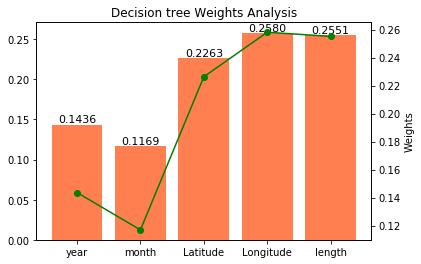

In [280]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(['year','month','Latitude','Longitude','length'],normal,color='coral')

ax2 =ax1.twinx()
ax2.plot(['year','month','Latitude','Longitude','length'],normal,color='g',marker='d')

for x,y in zip(['year','month','Latitude','Longitude','length'],normal):
    ax1.text(x,y,'%.4f'%y,ha='center',va='bottom',fontdict={'fontsize':11})

plt.title('Decision tree Weights Analysis')
plt.ylabel('Weights')

plt.savefig('Decision tree Weights Analysis.png',dpi=800)


In [241]:

importance = feat_importance.tolist().map(lambda x:x/sum)

AttributeError: 'list' object has no attribute 'map'

In [225]:
data_svm['Num'] = data_svm['Notes'].map(lambda x:len(x))

In [226]:
data_svm.to_csv('data_svm.csv')

In [105]:
from sklearn.metrics import accuracy_score
percent = []

In [ ]:
percent = []
index = []
for i in range(3,60):
    index.append(i)
    #训练模型
    clf=tree.DecisionTreeClassifier(max_depth=i,max_features=5,class_weight'balanced')
    clf=clf.fit(Bee_data_train,Bee_target_train,class_weight={0.36,0.12,0.20,0.04,0.28})
    # #绘图
    # dot_data=tree.export_graphviz(decision_tree=clf,
    #                             out_file=None,
    #                             rounded=True,
    #                             filled=True,
    #                             feature_names=['year','month','Latitude','Longitude','length'])

    # graph = pydotplus.graph_from_dot_data(dot_data)

    # display(Image(graph.create_png()))
    # graph.write_png('决策树.png')

    percent.append(accuracy_score(clf.predict(Bee_data_test,True), Bee_target_test))
# clf.predict(Bee_data_test,True)

In [282]:
pred = clf.predict(Bee_data_test,True)

In [289]:
pred

0     3
1     3
2     3
3     3
4     3
5     0
6     3
7     0
8     3
9     3
10    0
11    3
12    0
13    3
14    3
dtype: int64

In [284]:
pred = pred.tolist()

In [285]:
pred_svm = data_svm[data_svm['labels'] == 2]

In [286]:
pred = pd.Series(pred)

In [292]:
pred.index = pred_svm.index

In [293]:
pred_svm['Pred Lab Status'] = pred

In [295]:
pred_svm.to_csv('Pred_Lab_Status.csv')

In [230]:
percent

[0.6230566148430625,
 0.6218832502200059,
 0.6215899090642417,
 0.612496333235553,
 0.5860956292167792,
 0.5849222645937225,
 0.6315635083602229,
 0.6224699325315342,
 0.6127896743913172,
 0.5814021707245527,
 0.5825755353476093,
 0.5720152537400998,
 0.5805221472572601,
 0.5816955118803168,
 0.5723085948958639,
 0.5799354649457319,
 0.5714285714285714,
 0.5778820768553828,
 0.58404224112643,
 0.5418011146963919,
 0.5822821941918451,
 0.5843355822821942,
 0.5711352302728073,
 0.572601936051628,
 0.5805221472572601,
 0.5758286887650337,
 0.5802288061014961,
 0.5731886183631564,
 0.5822821941918451,
 0.5749486652977412,
 0.5793487826342035,
 0.5793487826342035,
 0.5811088295687885,
 0.5734819595189206,
 0.5802288061014961,
 0.5811088295687885,
 0.5819888530360809,
 0.5837488999706659,
 0.58404224112643,
 0.570548547961279,
 0.576415371076562,
 0.5479612789674392,
 0.5831622176591376,
 0.5843355822821942,
 0.5802288061014961,
 0.570548547961279,
 0.5731886183631564,
 0.5775887356996187,
 

In [176]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

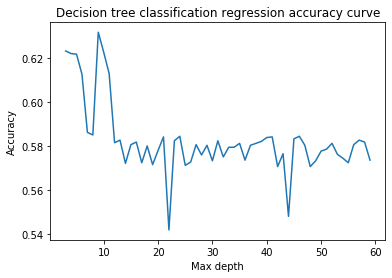

In [231]:
plt.plot(index,percent)
plt.title('Decision tree classification regression accuracy curve')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.savefig('Decision tree classification regression accuracy.png',dpi=800)

In [281]:
Bee_data_train = []
Bee_target_train = []
Bee_data_test = []
Bee_target_test = []
for i in range(1000):
    if data_svm['labels'][i] != 2 :
        Bee_data_train.append([data_svm['year'][i],data_svm['month'][i],data_svm['Latitude'][i],data_svm['Longitude'][i],len(data_svm['Notes'][i])])
        Bee_target_train.append(data_svm['labels'][i])
for i in range(1000,len(data_svm)):
    if data_svm['labels'][i] == 2 :
        Bee_data_test.append([data_svm['year'][i],data_svm['month'][i],data_svm['Latitude'][i],data_svm['Longitude'][i],len(data_svm['Notes'][i])])
        Bee_target_test.append(data_svm['labels'][i])

Bee_data_train = np.array(Bee_data_train,dtype=np.float64)
Bee_target_train = np.array(Bee_target_train,dtype=np.int32)
Bee_data_test = np.array(Bee_data_test,dtype=np.float64)
Bee_target_test = np.array(Bee_target_test,dtype=np.int32)

In [184]:
Bee_data_train.

9500

In [71]:
Bee_data_test

array([[ 2.01900000e+03,  1.20000000e+01,  4.89809940e+01,
        -1.22688503e+02,  5.50000000e+01],
       [ 2.01900000e+03,  1.00000000e+01,  4.89719490e+01,
        -1.22700941e+02,  2.70000000e+01],
       [ 2.02000000e+03,  1.00000000e+00,  4.89392000e+01,
        -1.22661300e+02,  6.80000000e+01],
       ...,
       [ 2.02000000e+03,  8.00000000e+00,  4.75041710e+01,
        -1.23057283e+02,  7.50000000e+01],
       [ 2.02000000e+03,  8.00000000e+00,  4.76382560e+01,
        -1.22351426e+02,  1.00000000e+00],
       [ 2.02000000e+03,  8.00000000e+00,  4.84595980e+01,
        -1.22846608e+02,  2.54000000e+02]])

In [ ]:
str(data_svm['labels'][i])+' '+'1:'+str(data_svm['year'][i])+' '+'2:'+str(data_svm['Latitude'][i])+' '+'3:'+str(data_svm['Longitude'][i])+' '+'4:'+str(data_svm['month'][i])+' '+'5:'+str(len(data_svm['Notes'][i]))+'\n')


In [44]:
 data_svm['year'] = data_svm['Detection Date'].dt.year

In [45]:
 data_svm['month'] = data_svm['Detection Date'].dt.month

In [173]:
data_svm

,Detection Date,Latitude,Longitude,Lab Status,Detection Num,labels,Detection Normal,Notes,year,month
Detection Date,,,,,,,,,,
2019-12-08,2019-12-08,48.980994,-122.688503,Positive ID,737401.0,1,-0.568116,"One dead wasp seen in Blaine, and suspect flyi...",2019,12
2019-10-30,2019-10-30,48.971949,-122.700941,Positive ID,737362.0,1,-0.684342,Hornet specimen sent to WSU,2019,10
2020-01-15,2020-01-15,48.939200,-122.661300,Unverified,737439.0,3,-0.454871,"Massive loss of bees, decapitated. No hornet s...",2020,1
2019-09-19,2019-09-19,49.149394,-123.943134,Positive ID,737321.0,1,-0.806527,This was the colony that was found and destroy...,2019,9
2019-08-31,2019-08-31,48.723779,-122.354431,Unverified,737302.0,3,-0.863150,I was cleaning my gutters when I heard a snapp...,2019,8
...,...,...,...,...,...,...,...,...,...,...
2020-10-02,2020-10-02,47.145673,-122.566734,Unprocessed,737700.0,2,0.322945,It was about an inch and a quarter in length. ...,2020,10
2020-08-29,2020-08-29,48.997938,-122.729890,Unprocessed,737666.0,2,0.221620,I was stung several times on the 7th hole ov t...,2020,8
2020-10-23,2020-10-23,47.651710,-122.692750,Unprocessed,737721.0,2,0.385528,Found dead in humming bird feeder. Silverdale WA,2020,10


In [177]:
data_svm.shape

(4424, 10)

In [197]:
data_svm[data_svm['labels'] == 2].size

150